In [320]:
cd ~/desktop

/Users/lamaemaharaj/Desktop


In [321]:
# Declaring Database Information 
hostname = 'localhost'
database = 'EconomicData'
username = 'sudarshan'
pwd = 'sudarshan'
port_id = 5432

In [322]:
# Importing the starting dependencies
import psycopg2 as psy
import numpy as np
import pandas as pd
import plotly.graph_objects as go

In [323]:
# Loading in the transformed data from the Postgres Database from my local machine
conn = psy.connect(host=hostname,port=port_id,database=database,user=username,password=pwd)
cursor = conn.cursor()
cursor.execute("SELECT * FROM approval_disapprovals")
rows = cursor.fetchall()
column_names = [desc[0] for desc in cursor.description]
Pres = pd.DataFrame(rows, columns=column_names)
Pres['approval'] = Pres['approval'].astype(float)
Pres['disapproval'] = Pres['disapproval'].astype(float)
Pres['years'] = Pres['years'].astype(str)
Pres[['Start Year', 'End Year']] = Pres['years'].str.split('-', expand=True)
Pres['Grouped Year'] = Pres['years']
Pres

,president,approval,disapproval,years,Start Year,End Year,Grouped Year
0,Trump,38.629630,55.712963,2017-2021,2017,2021,2017-2021
1,Roosevelt,72.300000,18.600000,1933-1945,1933,1945,1933-1945
2,Truman,42.092308,42.369231,1945-1952,1945,1952,1945-1952
3,Eisenhower,64.165217,21.000000,1953-1961,1953,1961,1953-1961
4,Kennedy,70.230769,15.846154,1961-1963,1961,1963,1961-1963
5,Johnson,55.367089,29.772152,1964-1968,1964,1968,1964-1968
6,Nixon,47.112245,36.663265,1969-1973,1969,1973,1969-1973
7,Ford,45.942857,36.600000,1974-1976,1974,1976,1974-1976
8,Carter,46.065934,38.021978,1977-1980,1977,1980,1977-1980
9,Reagan,52.547297,36.067568,1981-1988,1981,1988,1981-1988


In [324]:
# Function that sorts the years of the necessary terms between presidents
def group_years(year):
    if 1933 <= year <= 1945:
        return '1933-1945'
    elif 1945 <= year <=1952:
        return '1945-1952'
    elif 1953<=year<=1960:
        return '1953-1960'
    elif 1961<=year<=1963:
        return '1961-1963'
    elif 1964<=year<=1968:
        return '1964-1968'
    elif 1969<=year<=1973:
        return '1969-1973'
    elif 1974<=year<=1976:
        return '1974-1976'
    elif 1977<=year<=1980:
        return '1977-1980'
    elif 1981<=year<=1988:
        return '1981-1988'
    elif 1989<=year<=1992:
        return '1989-1992'
    elif 1993<=year<=2000:
        return '1993-2000'
    elif 2001<=year<=2008:
        return '2001-2008'
    elif 2008<=year<=2016:
        return '2008-2016'
    elif 2016<=year<=2020:
        return '2017-2021'
    else:
        return str(year)

In [325]:
# Importing Gross Domestic Product Data from my csv downloaded from FRED Database
GDP = pd.read_csv('GDP.csv')
GDP['DATE'] = pd.to_datetime(GDP['DATE'])
GDP['Period'] = GDP['DATE'].dt.strftime('%m-%Y')
GDP['Year'] = GDP['DATE'].dt.strftime('%Y')
GDP = GDP.groupby('Year').mean()
GDP = GDP.reset_index()
GDP['Year'] = GDP['Year'].astype(int)
GDP['Grouped Year'] = GDP['Year'].apply(group_years)
GDP = GDP[GDP['Year']<2020]
GDP = GDP.groupby('Grouped Year').mean()
GDP = GDP.reset_index()
GDP

,Grouped Year,Year,GDP
0,1945-1952,1949.5,301.773292
1,1953-1960,1956.5,459.237875
2,1961-1963,1962.0,601.194250
3,1964-1968,1966.0,808.153650
4,1969-1973,1971.0,1192.052650
5,1974-1976,1975.0,1701.186667
6,1977-1980,1978.5,2479.514625
7,1981-1988,1984.5,4154.093531
8,1989-1992,1990.5,6070.795125
9,1993-2000,1996.5,8422.644875


In [326]:
# Importing Personal Income Per Capita Data from my csv downloaded from FRED Database
PIPC = pd.read_csv('PersonalIncome.csv')
PIPC['DATE'] = pd.to_datetime(PIPC['DATE'])
PIPC['Period'] = PIPC['DATE'].dt.strftime('%m-%Y')
PIPC['Year'] = PIPC['DATE'].dt.strftime('%Y')
PIPC = PIPC.groupby('Year').mean()
PIPC = PIPC.reset_index()
PIPC['Year'] = PIPC['Year'].astype(int)
PIPC['Grouped Year'] = PIPC['Year'].apply(group_years)
PIPC = PIPC[PIPC['Year']<2020]
PIPC = PIPC.groupby('Grouped Year').mean()
PIPC = PIPC.reset_index()
PIPC

,Grouped Year,Year,PersonIncome
0,1969-1973,1973.0,5383.000000
1,1974-1976,1975.0,6360.666667
2,1977-1980,1978.5,8839.750000
3,1981-1988,1984.5,14259.750000
4,1989-1992,1990.5,19873.500000
5,1993-2000,1996.5,25689.875000
6,2001-2008,2004.5,35636.250000
7,2008-2016,2012.5,44639.500000
8,2017-2021,2018.0,53847.000000


In [327]:
# Importing Corporate Profits After Tax Data from my csv downloaded from FRED Database
CP = pd.read_csv('CP.csv')
CP['DATE'] = pd.to_datetime(CP['DATE'])
CP['Period'] = CP['DATE'].dt.strftime('%m-%Y')
CP['Year'] = CP['DATE'].dt.strftime('%Y')
CP = CP.groupby('Year').mean()
CP = CP.reset_index()
CP['Year'] = CP['Year'].astype(int)
CP['Grouped Year'] = CP['Year'].apply(group_years)
CP = CP[CP['Year']<2020]
CP = CP.groupby('Grouped Year').mean()
CP = CP.reset_index()
CP

,Grouped Year,Year,CP
0,1945-1952,1949.5,22.837708
1,1953-1960,1956.5,28.668000
2,1961-1963,1962.0,35.511667
3,1964-1968,1966.0,54.744150
4,1969-1973,1971.0,71.286000
5,1974-1976,1975.0,119.865500
6,1977-1980,1978.5,195.056312
7,1981-1988,1984.5,208.264406
8,1989-1992,1990.5,297.342000
9,1993-2000,1996.5,491.010719


In [328]:
# Importing Unemployment Data from my csv downloaded from FRED Database
UE = pd.read_csv('UNRATE.csv')
UE['DATE'] = pd.to_datetime(UE['DATE'])
UE['Period'] = UE['DATE'].dt.strftime('%m-%Y')
UE['Year'] = UE['DATE'].dt.strftime('%Y')
UE = UE.groupby('Year').mean()
UE =UE.reset_index()
UE['Year'] = UE['Year'].astype(int)
UE['Grouped Year'] = UE['Year'].apply(group_years)
UE = UE[UE['Year']<2020]
UE = UE.groupby('Grouped Year').mean()
UE = UE.reset_index()
UE

,Grouped Year,Year,UNRATE
0,1945-1952,1950.0,4.263333
1,1953-1960,1956.5,4.892708
2,1961-1963,1962.0,5.966667
3,1964-1968,1966.0,4.171667
4,1969-1973,1971.0,4.976667
5,1974-1976,1975.0,7.272222
6,1977-1980,1978.5,6.535417
7,1981-1988,1984.5,7.536458
8,1989-1992,1990.5,6.304167
9,1993-2000,1996.5,5.204167


In [329]:
# Importing Consumer Price Index Data from my csv downloaded from FRED Database
CPI = pd.read_csv('CPI.csv')
CPI['DATE'] = pd.to_datetime(CPI['DATE'])
CPI['Period'] = CPI['DATE'].dt.strftime('%m-%Y')
CPI['Year'] = CPI['DATE'].dt.strftime('%Y')
CPI = CPI.groupby('Year').mean()
CPI =CPI.reset_index()
CPI['Year'] = CPI['Year'].astype(int)
CPI['Grouped Year'] = CPI['Year'].apply(group_years)
CPI =CPI[CPI['Year']<2020]
CPI = CPI.groupby('Grouped Year').mean()
CPI['CPI'] = CPI['CPIAUCSL']
CPI = CPI.reset_index()
CPI

,Grouped Year,Year,CPIAUCSL,CPI
0,1945-1952,1949.5,24.464722,24.464722
1,1953-1960,1956.5,27.918646,27.918646
2,1961-1963,1962.0,30.262778,30.262778
3,1964-1968,1966.0,32.640833,32.640833
4,1969-1973,1971.0,40.448333,40.448333
5,1974-1976,1975.0,53.358333,53.358333
6,1977-1980,1978.5,70.206250,70.206250
7,1981-1988,1984.5,105.020833,105.020833
8,1989-1992,1990.5,132.768750,132.768750
9,1993-2000,1996.5,158.031250,158.031250


In [330]:
# Importing Inflation Percentages Data from my csv downloaded from FRED Database
inf = pd.read_csv('inf.csv')
inf['DATE'] = pd.to_datetime(inf['DATE'])
inf['Period'] = inf['DATE'].dt.strftime('%m-%Y')
inf['Year'] = inf['DATE'].dt.strftime('%Y')
inf = inf.groupby('Year').mean()
inf =inf.reset_index()
inf['Year'] = inf['Year'].astype(int)
inf['Grouped Year'] = inf['Year'].apply(group_years)
inf = inf[inf['Year']<2020]
inf = inf.groupby('Grouped Year').mean()
inf = inf.reset_index()
inf

,Grouped Year,Year,inf
0,1969-1973,1973.0,6.177760
1,1974-1976,1975.0,8.647588
2,1977-1980,1978.5,9.734080
3,1981-1988,1984.5,4.645639
4,1989-1992,1990.5,4.372186
5,1993-2000,1996.5,2.593822
6,2001-2008,2004.5,2.833750
7,2008-2016,2012.5,1.372243
8,2017-2021,2018.0,2.128301


In [331]:
debt = pd.read_csv('debt.csv')
debt['DATE'] = pd.to_datetime(debt['DATE'])
debt['Period'] = debt['DATE'].dt.strftime('%m-%Y')
debt['Year'] = debt['DATE'].dt.strftime('%Y')
debt = debt.groupby('Year').mean()
debt =debt.reset_index()
debt['Year'] = debt['Year'].astype(int)
debt['Grouped Year'] = debt['Year'].apply(group_years)
debt = debt[debt['Year']<2020]
debt = debt.groupby('Grouped Year').mean()
debt['debt'] = debt['GFDEBTN']
debt = debt.reset_index()
debt

,Grouped Year,Year,GFDEBTN,debt
0,1964-1968,1967.0,3.360980e+05,3.360980e+05
1,1969-1973,1971.0,4.079235e+05,4.079235e+05
2,1974-1976,1975.0,5.503624e+05,5.503624e+05
3,1977-1980,1978.5,7.913411e+05,7.913411e+05
4,1981-1988,1984.5,1.728328e+06,1.728328e+06
5,1989-1992,1990.5,3.420178e+06,3.420178e+06
6,1993-2000,1996.5,5.195971e+06,5.195971e+06
7,2001-2008,2004.5,7.675435e+06,7.675435e+06
8,2008-2016,2012.5,1.603810e+07,1.603810e+07
9,2017-2021,2018.0,2.134795e+07,2.134795e+07


In [332]:
# Merging the data tables for between all Economic Metrics 
df = pd.merge(Pres,GDP,on='Grouped Year')
df = pd.merge(df,CP,on='Grouped Year')
df = pd.merge(df,PIPC,on='Grouped Year')
df = pd.merge(df,UE,on='Grouped Year')
df = pd.merge(df,CPI,on='Grouped Year')
df = pd.merge(df,inf,on='Grouped Year')
df = pd.merge(df,debt,on='Grouped Year')
df['Unemployment'] = df['UNRATE']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9 entries, 0 to 8
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   president     9 non-null      object 
 1   approval      9 non-null      float64
 2   disapproval   9 non-null      float64
 3   years         9 non-null      object 
 4   Start Year    9 non-null      object 
 5   End Year      9 non-null      object 
 6   Grouped Year  9 non-null      object 
 7   Year_x        9 non-null      float64
 8   GDP           9 non-null      float64
 9   Year_y        9 non-null      float64
 10  CP            9 non-null      float64
 11  Year_x        9 non-null      float64
 12  PersonIncome  9 non-null      float64
 13  Year_y        9 non-null      float64
 14  UNRATE        9 non-null      float64
 15  Year_x        9 non-null      float64
 16  CPIAUCSL      9 non-null      float64
 17  CPI           9 non-null      float64
 18  Year_y        9 non-null      floa

/var/folders/y1/cj1dr0kd7lng8yfkrtd5_r_00000gn/T/ipykernel_61696/2148251095.py:5: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Year_x'} in the result is deprecated and will raise a MergeError in a future version.

/var/folders/y1/cj1dr0kd7lng8yfkrtd5_r_00000gn/T/ipykernel_61696/2148251095.py:7: FutureWarning:

Passing 'suffixes' which cause duplicate columns {'Year_x'} in the result is deprecated and will raise a MergeError in a future version.



In [337]:
df = df[['Grouped Year','president','approval','disapproval','GDP','CP','PersonIncome','UNRATE','CPI','inf','Unemployment','debt','Year']]
df = pd.concat([df.iloc[1:], df.iloc[:1]], ignore_index=True)
df

,Grouped Year,president,approval,disapproval,GDP,CP,PersonIncome,UNRATE,CPI,inf,Unemployment,debt,Year
0,1969-1973,Nixon,47.112245,36.663265,1192.052650,71.286000,5383.000000,4.976667,40.448333,6.177760,4.976667,4.079235e+05,1971.0
1,1974-1976,Ford,45.942857,36.600000,1701.186667,119.865500,6360.666667,7.272222,53.358333,8.647588,7.272222,5.503624e+05,1975.0
2,1977-1980,Carter,46.065934,38.021978,2479.514625,195.056312,8839.750000,6.535417,70.206250,9.734080,6.535417,7.913411e+05,1978.5
3,1981-1988,Reagan,52.547297,36.067568,4154.093531,208.264406,14259.750000,7.536458,105.020833,4.645639,7.536458,1.728328e+06,1984.5
4,1989-1992,Bush 1,60.126582,28.202532,6070.795125,297.342000,19873.500000,6.304167,132.768750,4.372186,6.304167,3.420178e+06,1990.5
5,1993-2000,Clinton,55.578947,37.004386,8422.644875,491.010719,25689.875000,5.204167,158.031250,2.593822,5.204167,5.195971e+06,1996.5
6,2001-2008,Bush 2,51.003704,43.474074,12660.443875,1008.165656,35636.250000,5.270833,193.655010,2.833750,5.270833,7.675435e+06,2004.5
7,2008-2016,Obama,47.785118,45.705989,16584.468906,1665.079187,44639.500000,7.445833,229.227979,1.372243,7.445833,1.603810e+07,2012.5
8,2017-2021,Trump,38.629630,55.712963,20463.790000,1954.894833,53847.000000,3.977778,250.624056,2.128301,3.977778,2.134795e+07,2018.0


In [338]:
df['Unemp PerChange'] = df['Unemployment'].pct_change() * 100
df['PersonIncome PerChange'] = df['PersonIncome'].pct_change() * 100
df['GDP PerChange'] = df['GDP'].pct_change() * 100
df['CP PerChange'] = df['CP'].pct_change() * 100
df['inf PerChange'] = df['inf'].pct_change() * 100
df['CPI PerChange'] = df['CPI'].pct_change() * 100
df['debt PerChange'] = df['debt'].pct_change() * 100
df

,Grouped Year,president,approval,disapproval,GDP,CP,PersonIncome,UNRATE,CPI,inf,Unemployment,debt,Year,Unemp PerChange,PersonIncome PerChange,GDP PerChange,CP PerChange,inf PerChange,CPI PerChange,debt PerChange
0,1969-1973,Nixon,47.112245,36.663265,1192.052650,71.286000,5383.000000,4.976667,40.448333,6.177760,4.976667,4.079235e+05,1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1974-1976,Ford,45.942857,36.600000,1701.186667,119.865500,6360.666667,7.272222,53.358333,8.647588,7.272222,5.503624e+05,1975.0,46.126367,18.162115,42.710699,68.147322,39.979345,31.917261,34.918063
2,1977-1980,Carter,46.065934,38.021978,2479.514625,195.056312,8839.750000,6.535417,70.206250,9.734080,6.535417,7.913411e+05,1978.5,-10.131780,38.975212,45.752061,62.729320,12.564106,31.575043,43.785447
3,1981-1988,Reagan,52.547297,36.067568,4154.093531,208.264406,14259.750000,7.536458,105.020833,4.645639,7.536458,1.728328e+06,1984.5,15.317182,61.313951,67.536561,6.771426,-52.274498,49.589009,118.404955
4,1989-1992,Bush 1,60.126582,28.202532,6070.795125,297.342000,19873.500000,6.304167,132.768750,4.372186,6.304167,3.420178e+06,1990.5,-16.351071,39.367801,46.140068,42.771396,-5.886228,26.421345,97.889376
5,1993-2000,Clinton,55.578947,37.004386,8422.644875,491.010719,25689.875000,5.204167,158.031250,2.593822,5.204167,5.195971e+06,1996.5,-17.448777,29.266989,38.740391,65.133321,-40.674479,19.027444,51.921096
6,2001-2008,Bush 2,51.003704,43.474074,12660.443875,1008.165656,35636.250000,5.270833,193.655010,2.833750,5.270833,7.675435e+06,2004.5,1.281025,38.717102,50.314350,105.324572,9.249971,22.542225,47.718968
7,2008-2016,Obama,47.785118,45.705989,16584.468906,1665.079187,44639.500000,7.445833,229.227979,1.372243,7.445833,1.603810e+07,2012.5,41.264822,25.264303,30.994372,65.159285,-51.575020,18.369248,108.953599
8,2017-2021,Trump,38.629630,55.712963,20463.790000,1954.894833,53847.000000,3.977778,250.624056,2.128301,3.977778,2.134795e+07,2018.0,-46.577131,20.626351,23.391289,17.405517,55.096547,9.333972,33.107754


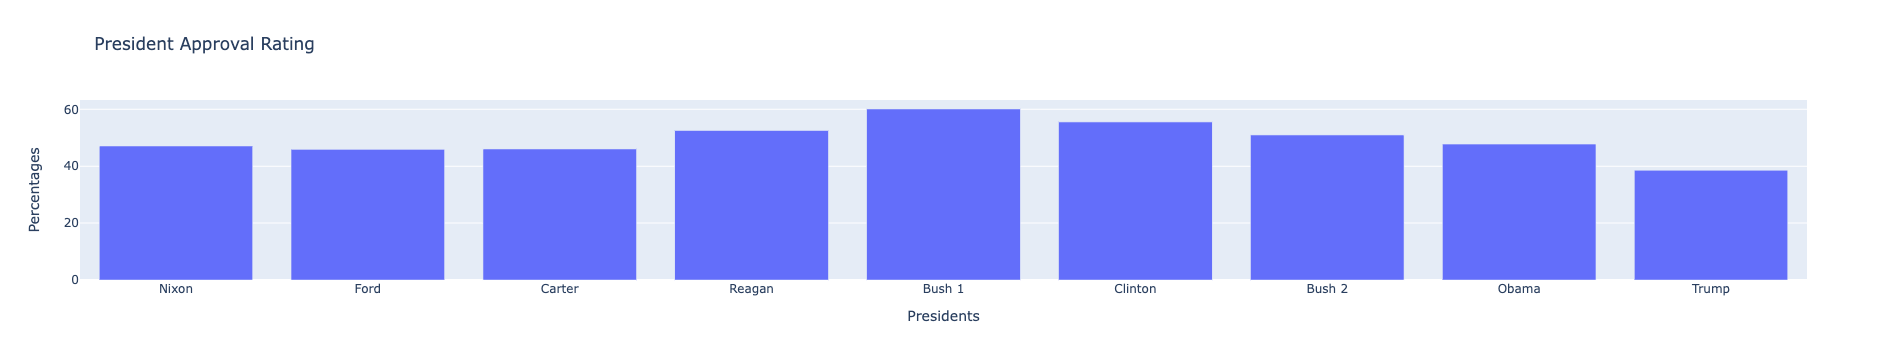

In [339]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['approval']))
fig.update_layout(
    title='President Approval Rating',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

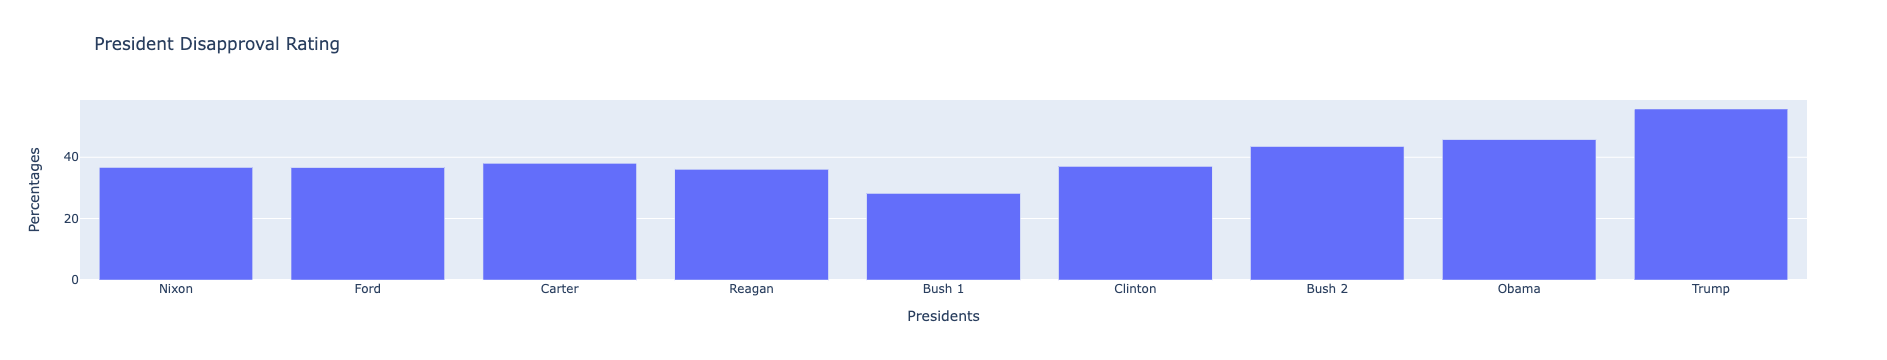

In [340]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['disapproval']))
fig.update_layout(
    title='President Disapproval Rating',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

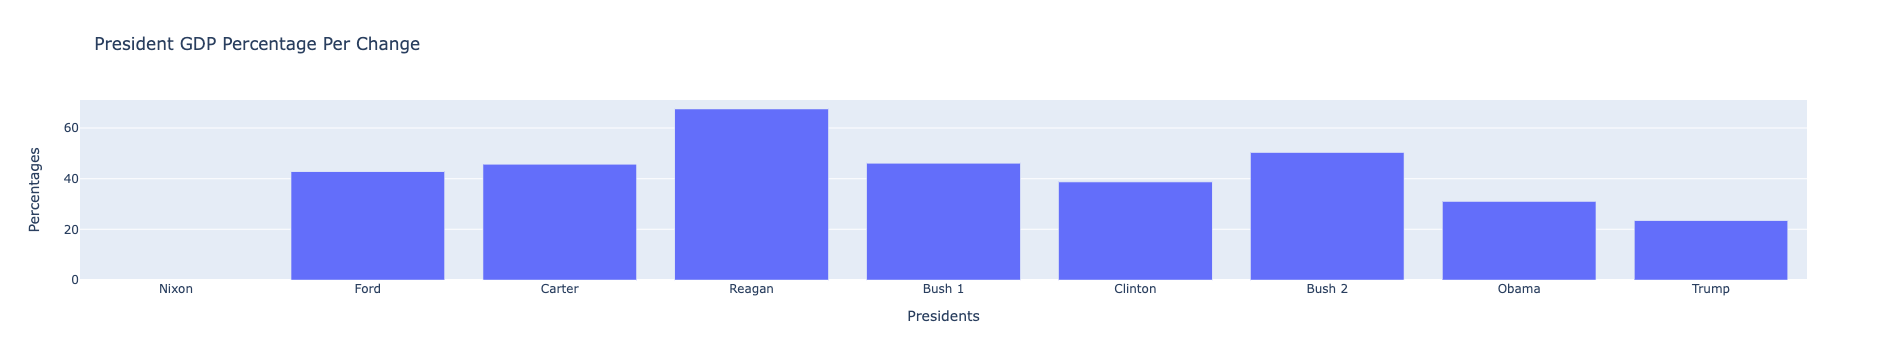

In [341]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['GDP PerChange']))
fig.update_layout(
    title='President GDP Percentage Per Change',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

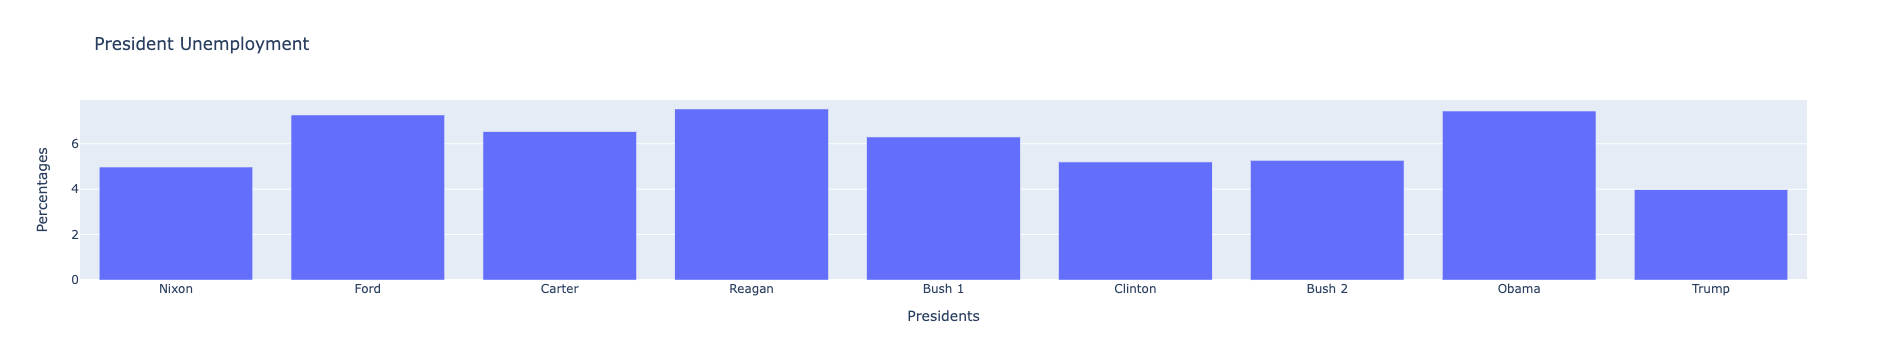

In [342]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['Unemployment']))
fig.update_layout(
    title='President Unemployment',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

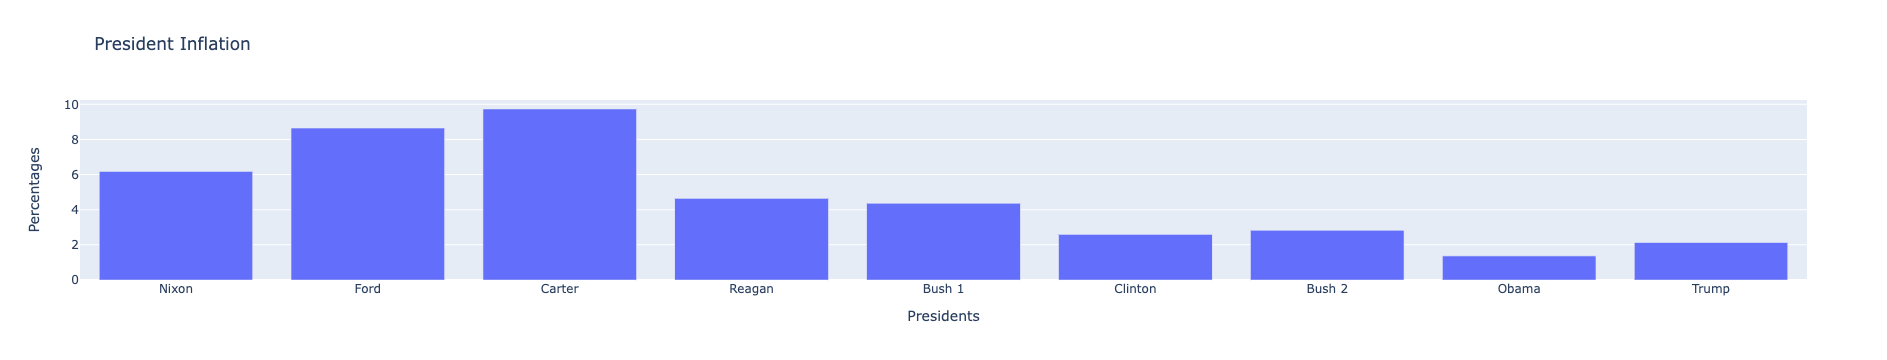

In [343]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['inf']))
fig.update_layout(
    title='President Inflation',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

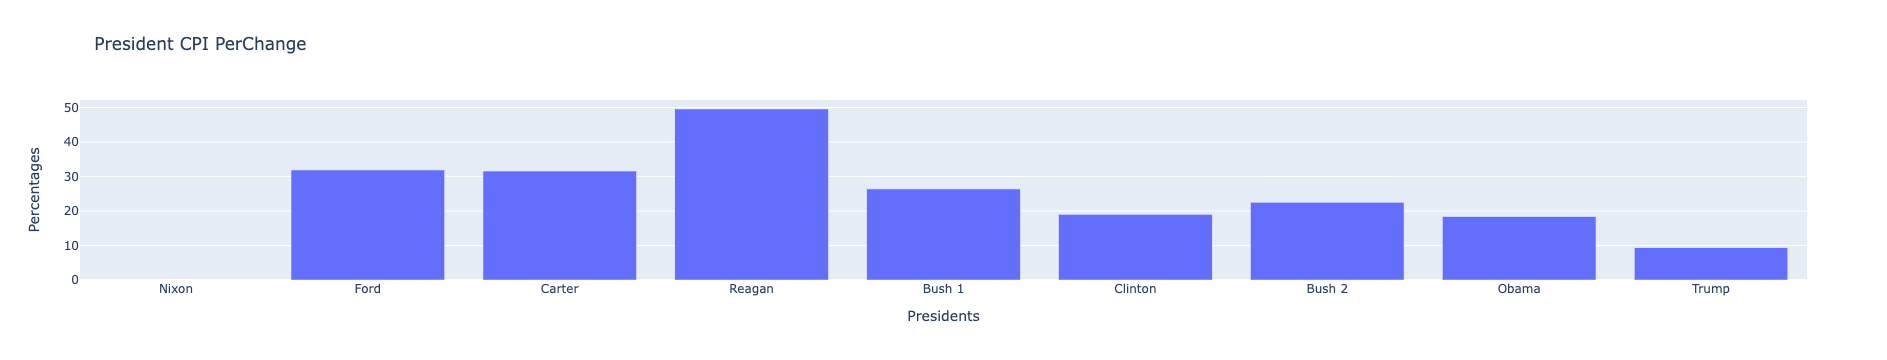

In [344]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['CPI PerChange']))
fig.update_layout(
    title='President CPI PerChange',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

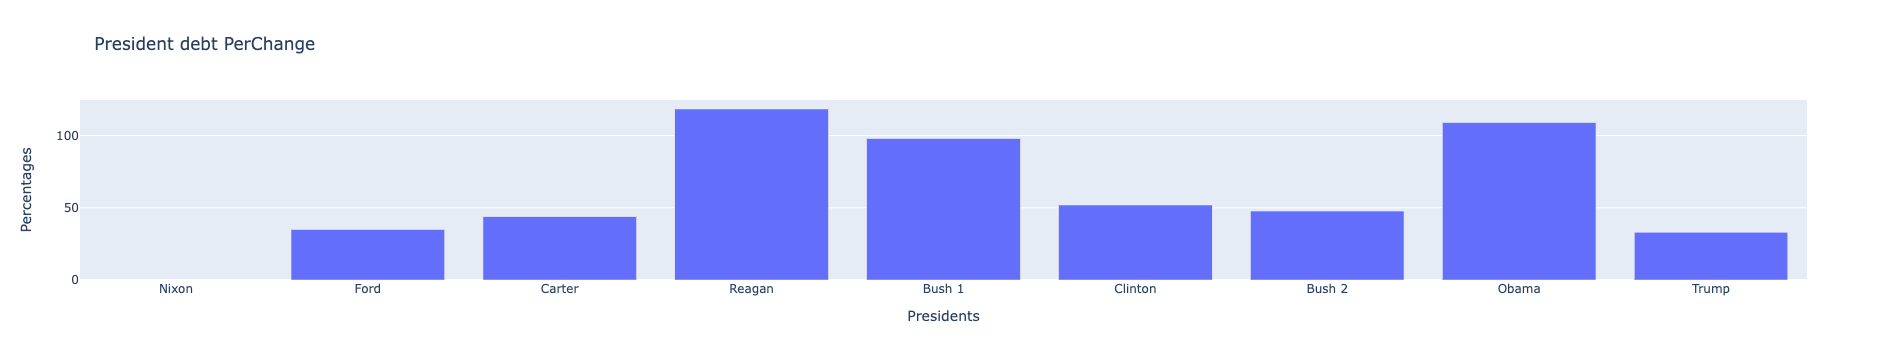

In [345]:
fig = go.Figure(data=go.Bar(x=df['president'], y=df['debt PerChange']))
fig.update_layout(
    title='President debt PerChange',
    xaxis_title='Presidents',
    yaxis_title='Percentages')
fig.show()

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Grouped Year            9 non-null      object 
 1   president               9 non-null      object 
 2   approval                9 non-null      float64
 3   disapproval             9 non-null      float64
 4   GDP                     9 non-null      float64
 5   CP                      9 non-null      float64
 6   PersonIncome            9 non-null      float64
 7   UNRATE                  9 non-null      float64
 8   CPI                     9 non-null      float64
 9   inf                     9 non-null      float64
 10  Unemployment            9 non-null      float64
 11  debt                    9 non-null      float64
 12  Year                    9 non-null      float64
 13  Unemp PerChange         8 non-null      float64
 14  PersonIncome PerChange  8 non-null      float6

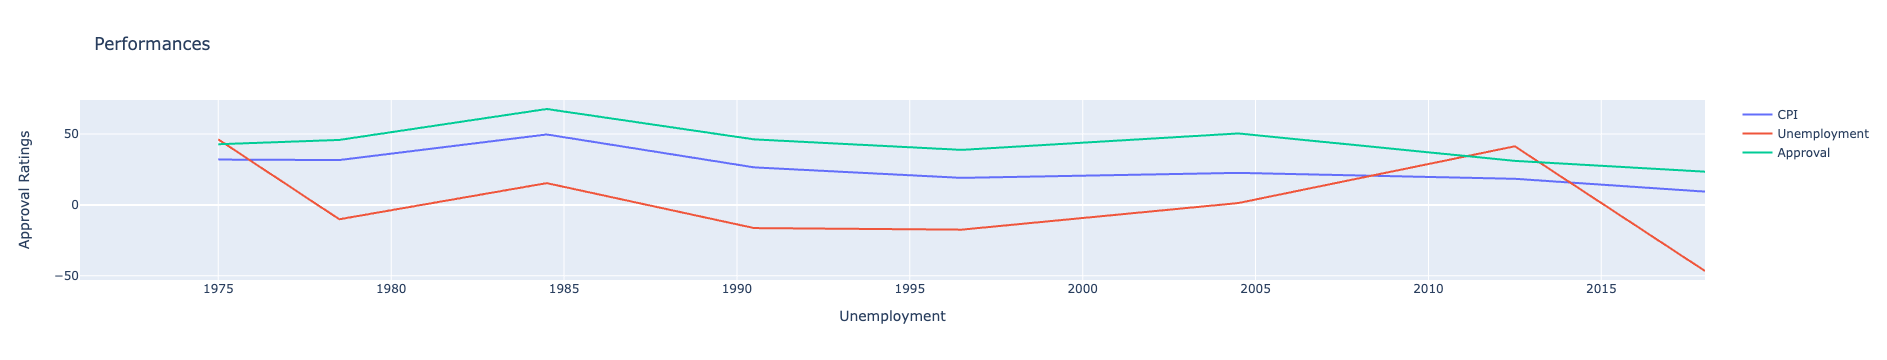

In [357]:
GDP = go.Scatter(
    x=df['Year'],
    y=df['GDP PerChange'],
    mode='lines',
    name='Approval'
)

unemployment = go.Scatter(
    x=df['Year'],
    y=df['Unemp PerChange'],
    mode='lines',
    name='Unemployment'
)

CPI_ = go.Scatter(
    x=df['Year'],
    y=df['CPI PerChange'],
    mode='lines',
    name='CPI'
)

layout = go.Layout(
    title='Presidential Performances',
    xaxis=dict(title='Unemployment',),
    yaxis=dict(title='Approval Ratings')
)
figure = go.Figure(data=[CPI_,unemployment,GDP], layout=layout)
figure.show()

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Grouped Year            9 non-null      object 
 1   president               9 non-null      object 
 2   approval                9 non-null      float64
 3   disapproval             9 non-null      float64
 4   GDP                     9 non-null      float64
 5   CP                      9 non-null      float64
 6   PersonIncome            9 non-null      float64
 7   UNRATE                  9 non-null      float64
 8   CPI                     9 non-null      float64
 9   inf                     9 non-null      float64
 10  Unemployment            9 non-null      float64
 11  debt                    9 non-null      float64
 12  Year                    9 non-null      float64
 13  Unemp PerChange         8 non-null      float64
 14  PersonIncome PerChange  8 non-null      float6

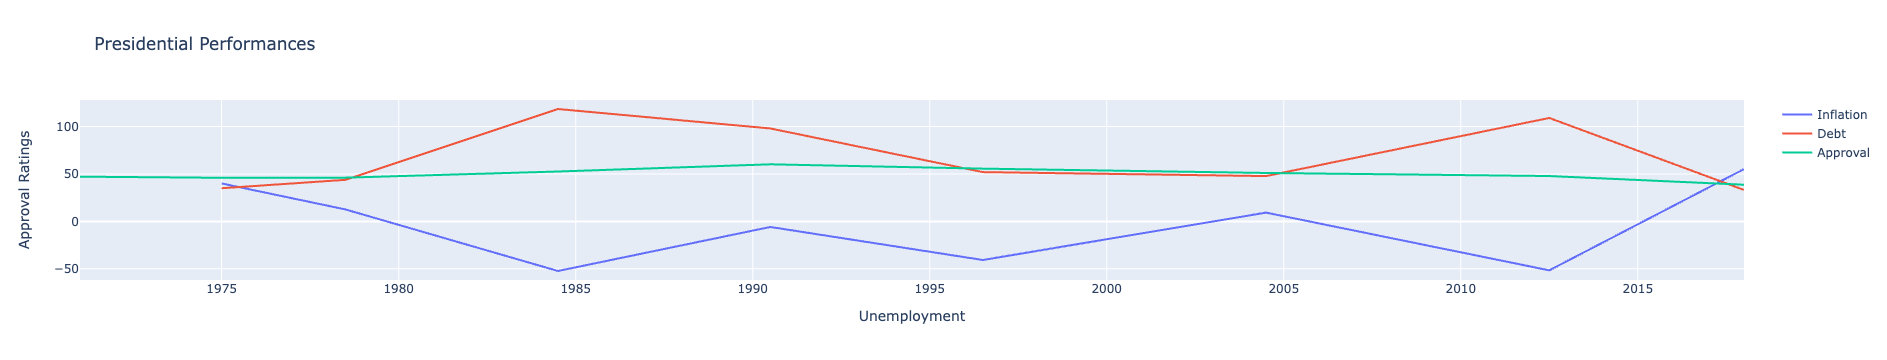

In [361]:
inf = go.Scatter(
    x=df['Year'],
    y=df['inf PerChange'],
    mode='lines',
    name='Inflation'
)

debt = go.Scatter(
    x=df['Year'],
    y=df['debt PerChange'],
    mode='lines',
    name='Debt'
)

Approval = go.Scatter(
    x=df['Year'],
    y=df['approval'],
    mode='lines',
    name='Approval'
)

layout = go.Layout(
    title='Presidential Performances',
    xaxis=dict(title='Unemployment',),
    yaxis=dict(title='Approval Ratings')
)
figure = go.Figure(data=[inf,debt,Approval], layout=layout)
figure.show()